### Importing Required Libraries

In [ ]:


import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
import glob
import zipfile as zf

import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

from skimage.io import imread, imshow

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import warnings
warnings.filterwarnings('ignore')



### Load Data


In [ ]:
!wget https://storage.googleapis.com/final_amt/archive.zip

--2023-01-14 22:11:27--  https://storage.googleapis.com/final_amt/archive.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447914276 (427M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>] 427.16M  22.5MB/s    in 21s     

2023-01-14 22:11:49 (20.3 MB/s) - ‘archive.zip’ saved [447914276/447914276]



In [ ]:
dataset = zf.ZipFile(f'archive.zip', 'r')
dataset.extractall()
dataset.close()

In [ ]:
train_o = "/content/DATASET/TRAIN/O/*.jpg"


In [ ]:
train_r = "/content/DATASET/TRAIN/R/*.jpg"

### Let us view some of the images of Organic type

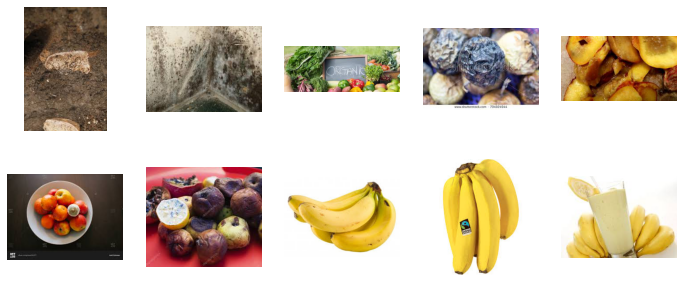

In [ ]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10005.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10013.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_1014.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10258.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10297.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10379.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10426.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10616.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10680.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10895.jpg")
plt.imshow(img)



### Let us view some of the images of Recycle type

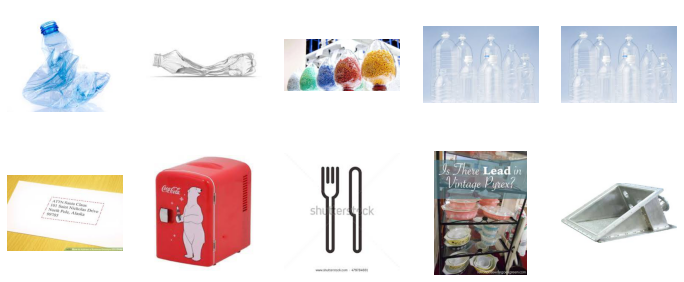

In [ ]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_800.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_6783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_1783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_8589.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_9000.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_5000.jpg")
plt.imshow(img)

### Data Augmentation

This tutorial demonstrates data augmentation: a technique to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation.

You will learn how to apply data augmentation in two ways:

Use the Keras preprocessing layers, such as tf.keras.layers.Resizing, tf.keras.layers.Rescaling, tf.keras.layers.RandomFlip, and tf.keras.layers.RandomRotation.
Use the tf.image methods, such as tf.image.flip_left_right, tf.image.rgb_to_grayscale, tf.image.adjust_brightness, tf.image.central_crop, and tf.image.stateless_random*.


ImageDataGenerator: Generate batches of tensor image data with real-time data augmentation

In [ ]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   zoom_range = 0.4,
                                   rotation_range = 10,
                                   horizontal_flip = False,
                                   vertical_flip = False,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1.0 / 255.0)



rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).

- horizontal_flip and vertical_flip = False improves the model

In [ ]:
# --------------------
# Flow training images in batches of 64 using train_datagen generator
# --------------------
train_dataset  = train_datagen.flow_from_directory(directory = '/content/DATASET/TRAIN',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 30, 
                                                   subset = 'training')
# --------------------
# Flow validation images in batches of 64 using valid_datagen generator
# --------------------
validation_dataset = valid_datagen.flow_from_directory(directory = '/content/DATASET/TRAIN',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 30, 
                                                  subset = 'validation')

# Test Data 

test_dataset = test_datagen.flow_from_directory(directory = '/content/DATASET/TEST',
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 30)

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


- decreasing the batch_size improves the model

### Model Building

Formation of CNN


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 224x224 with 3 color
    tf.keras.layers.Conv2D(filters=32,activation='relu',input_shape=(224,224,3),padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=32,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=128,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(units=256,activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic') 
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])

In [ ]:
#The following is the model summary of the model:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    


Model Summary

Each layer has an output and its shape is shown in the “Output Shape” column. Each layer's output becomes the input for the subsequent layer. The “Param #” column shows you the number of parameters that are trained for each layer

## Specifying the optimizers and compile the model

In [ ]:
monitor = EarlyStopping(monitor='val_auc', patience=2, 
                        verbose=1, mode='max',restore_best_weights=True)
# Defining Callbacks

filepath = './best_weights.hdf5'
checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [monitor, checkpoint]

# model compile
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = [tf.keras.metrics.AUC(name = 'auc')])

## Model Fitting

In [ ]:
history = model.fit(train_dataset,
                              validation_data=validation_dataset,
                              epochs=9,
                              verbose=1, callbacks=callback_list)

Epoch 1/9
602/602 [==============================] - ETA: 0s - loss: 0.5490 - auc: 0.8384
Epoch 1: val_auc improved from -inf to 0.87841, saving model to ./best_weights.hdf5
602/602 [==============================] - 242s 382ms/step - loss: 0.5490 - auc: 0.8384 - val_loss: 0.5967 - val_auc: 0.8784
Epoch 2/9
279/602 [============>.................] - ETA: 1:54 - loss: 0.4505 - auc: 0.8819

## Model Evaluation

In [ ]:
# plotting model auc

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

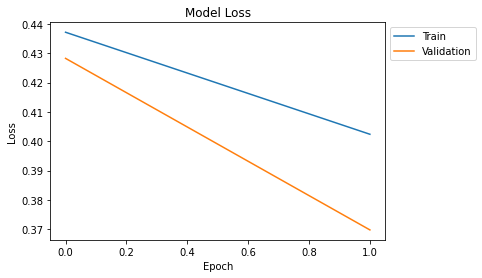

In [ ]:
# plotting model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# Evaluating Loss and AUC for Test data 

model.evaluate(test_dataset)

40/40 [==============================] - 6s 141ms/step - loss: 0.2986 - auc: 0.9452


[0.2985948324203491, 0.9452009797096252]

1/1 [==============================] - 0s 22ms/step
The image belongs to Organic waste category 


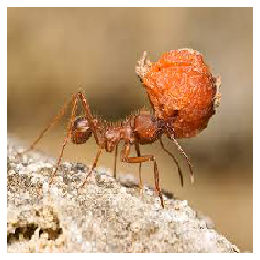

In [ ]:
# Test - ORGANIC

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img("/content/DATASET/TRAIN/O/O_10009.jpg", target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict(img)


if pred[0][0] > 0.5:
    print("The image belongs to Recycle waste category")
else:
    print("The image belongs to Organic waste category ")

1/1 [==============================] - 0s 20ms/step
The image belongs to Recycle waste category


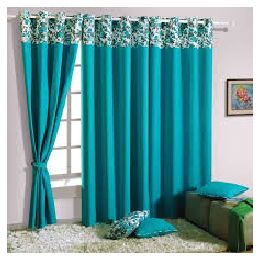

In [ ]:
# Test - RECYCLE

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img('/content/DATASET/TEST/R/R_10012.jpg', target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict(img)

if pred[0][0] > 0.5:
    print("The image belongs to Recycle waste category")
else:
    print("The image belongs to Organic waste category ")